# Car Price Classification

This notebook predicts whether a car is **Affordable** or **Expensive** using a Random Forest Classifier.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("car_price_dataset.csv")

# Display the first few rows
df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Data Preprocessing
We categorize the **Price** column into 'Affordable' and 'Expensive' based on the median value.

In [3]:

# Define Affordable vs Expensive (Median Price as Threshold)
median_price = df['Price'].median()
df['Price_Category'] = df['Price'].apply(lambda x: 'Affordable' if x <= median_price else 'Expensive')

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Price_Category']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['Price', 'Price_Category'])
y = df['Price_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training
We train a **Random Forest Classifier** to predict car affordability.

In [5]:

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## Model Evaluation
We evaluate the model using **Accuracy, Classification Report, and Confusion Matrix**.

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       969
           1       0.95      0.95      0.95      1031

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



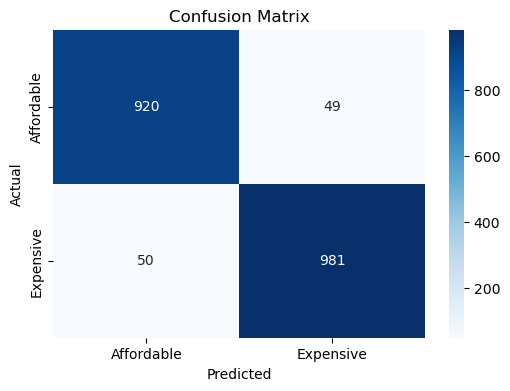

In [7]:

# Model Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Conclusion
The **Random Forest Classifier** provides insights into whether a car is affordable or expensive based on its features. Further improvements can be made by tuning hyperparameters or trying different models.